In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import scipy.special as sps
import pandas as pd
import itertools
import os

# gamma distribution

In [2]:
shape, scale = 2., 1.5  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

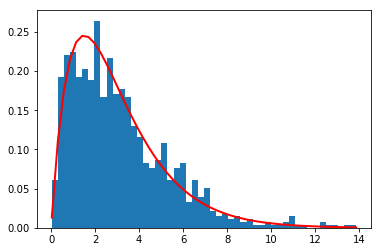

In [3]:
count, bins, ignored = plt.hist(s, 50, normed=True) #density=True
y = bins**(shape-1)*(np.exp(-bins/scale) /
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

In [23]:
fixation = random.sample(s, 30)
fixation = np.random.choice(s, size=[5,2,30], replace=True)

In [33]:
sum(sum(sum(fixation)))

883.45090654798855

In [24]:
fixation[4][1]

array([  1.63510478,   0.8951117 ,   0.91393   ,   0.81042952,
         0.31973814,   0.98002912,   3.77834489,   1.91181408,
         1.3490727 ,   3.64461383,   1.10785276,   4.41508725,
         7.21082579,  13.49511066,   6.39773067,   3.89487533,
         1.48015156,   1.01789187,   2.78645799,   0.89211229,
         6.60067489,   1.61399981,   9.72346719,   2.59266639,
         3.12297217,   0.34576642,   1.31791995,   6.18952232,
         3.43433548,   3.71453571])

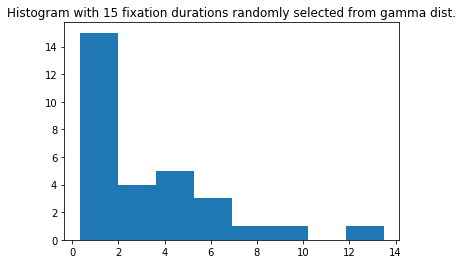

In [25]:
plt.hist(fixation[4][1], bins='auto')  
plt.title("Histogram with 15 fixation durations randomly selected from gamma dist.")
plt.show()

# create pandas dataframe

In [26]:
condition_1 = pd.DataFrame()
condition_1['fixation'] = fixation[4][1]
condition_1['cue'] = 2
condition_1['target'] = 1.5
condition_1['cue_onset'] = np.nan
condition_1['target_onset'] =np.nan
condition_1['fixation_onset'] =np.nan

In [27]:
condition_1

,fixation,cue,target,cue_onset,target_onset,fixation_onset
0,1.635105,2,1.5,NaN,NaN,NaN
1,0.895112,2,1.5,NaN,NaN,NaN
2,0.913930,2,1.5,NaN,NaN,NaN
3,0.810430,2,1.5,NaN,NaN,NaN
4,0.319738,2,1.5,NaN,NaN,NaN
5,0.980029,2,1.5,NaN,NaN,NaN
6,3.778345,2,1.5,NaN,NaN,NaN
7,1.911814,2,1.5,NaN,NaN,NaN
8,1.349073,2,1.5,NaN,NaN,NaN
9,3.644614,2,1.5,NaN,NaN,NaN


---------- >8 --------------------------------------------------

---------- >8 --------------------------------------------------

# randomize conditions

In [18]:
trials = [np.repeat('con',16) , np.repeat('incon',4) , np.repeat('neu',10)]

In [19]:
C = list(itertools.repeat('con', 16))
I = list(itertools.repeat('incon', 4))
N = list(itertools.repeat('neu', 10))
trials = C + I + N

In [20]:
random.shuffle(trials)

In [21]:
random.shuffle(trials)
df = pd.DataFrame()
df['trial_type'] = trials

In [22]:
df

,trial_type
0,con
1,con
2,con
3,con
4,neu
5,con
6,con
7,con
8,con
9,neu


# create EV files

In [28]:
cue_onset_neu = pd.DataFrame()
cue_onset_con = pd.DataFrame()
cue_onset_incon = pd.DataFrame()
target_onset_neu = pd.DataFrame()
target_onset_con = pd.DataFrame()
target_onset_incon = pd.DataFrame()
# for index in range(1,11):
index = 1   
sheetname = 'c' + str(index)
# load xlsx
df = pd.read_excel('/Users/h/Dropbox/Projects/SI.01/coding/design/onset_time_25.xlsx', sheet_name = sheetname)

# create separate pandas
# d = {index: label for index, label in df.groupby('trial_type')}
d = {k: df[df['trial_type'] == k] for k in df['trial_type'].unique()}
# create EV files based on sheet

# 6 files
# CUE ____________________
# cue_onset neu
cue_onset_neu['onset'] = d['neu']['cue_onset'].copy().reset_index(drop=True)
cue_onset_neu['duration'] = 2
cue_onset_neu['magnitude'] = 1
# cue_onset con
cue_onset_con['onset'] = d['con']['cue_onset'].copy().reset_index(drop=True)
cue_onset_con['duration'] = 2
cue_onset_con['magnitude'] = 1
# cue_onset incon
cue_onset_incon['onset'] = d['incon']['cue_onset'].copy().reset_index(drop=True)
cue_onset_incon['duration'] = 2
cue_onset_incon['magnitude'] = 1

# TARGET ____________________
# target_onset neu
target_onset_neu['onset'] = d['neu']['target_onset'].copy().reset_index(drop=True)
target_onset_neu['duration'] = 1.5
target_onset_neu['magnitude'] = 1
# target_onset con
target_onset_con['onset'] = d['con']['target_onset'].copy().reset_index(drop=True)
target_onset_con['duration'] = 1.5
target_onset_con['magnitude'] = 1
# target_onset incon
target_onset_incon['onset'] = d['incon']['target_onset'].copy().reset_index(drop=True)
target_onset_incon['duration'] = 1.5
target_onset_incon['magnitude'] = 1

# SAVE _________________________
sub_run_dir = '/Users/h/Dropbox/Projects/SI.01/coding/data/sub-01/run-01'
cue_onset_neu_fname = os.sep.join([sub_run_dir, 'face_CUE_neu_25.txt'])
cue_onset_neu.to_csv(cue_onset_neu_fname, index = False, header = False, sep = '\t')

cue_onset_con_fname = os.sep.join([sub_run_dir, 'face_CUE_con_25.txt'])
cue_onset_con.to_csv(cue_onset_con_fname, index = False, header = False, sep = '\t')

cue_onset_incon_fname = os.sep.join([sub_run_dir, 'face_CUE_incon_25.txt'])
cue_onset_incon.to_csv(cue_onset_incon_fname, index = False, header = False, sep = '\t')

target_onset_neu_fname = os.sep.join([sub_run_dir, 'face_TARGET_neu_25.txt'])
target_onset_neu.to_csv(target_onset_neu_fname, index = False, header = False, sep = '\t')

target_onset_con_fname = os.sep.join([sub_run_dir, 'face_TARGET_con_25.txt'])
target_onset_con.to_csv(target_onset_con_fname, index = False, header = False, sep = '\t')

target_onset_incon_fname = os.sep.join([sub_run_dir, 'face_TARGET_incon_25.txt'])
target_onset_incon.to_csv(target_onset_incon_fname, index = False, header = False, sep = '\t')

In [29]:
d['neu']

,fixation,cue,target,cue_onset,target_onset,fixation_onset,trial_type
4,0.319738,2,1.5,18.574315,20.574315,22.074315,neu
9,3.644614,2,1.5,47.738190,49.738190,51.238190,neu
12,7.210826,2,1.5,70.971956,72.971956,74.471956,neu
17,1.017892,2,1.5,114.757717,116.757717,118.257717,neu
19,0.892112,2,1.5,125.436287,127.436287,128.936287,neu
21,1.614000,2,1.5,140.650962,142.650962,144.150962,neu
24,3.122972,2,1.5,166.590067,168.590067,170.090067,neu
26,1.317920,2,1.5,175.253753,177.253753,178.753753,neu
27,6.189522,2,1.5,184.943275,186.943275,188.443275,neu
28,3.434335,2,1.5,191.877610,193.877610,195.377610,neu


In [30]:
cue_onset_neu['onset']
cue_onset_con['onset']
cue_onset_incon['onset']
target_onset_neu['onset']
target_onset_con['onset']
target_onset_incon['onset']

0     54.346043
1    137.536962
2    161.967095
3    201.092146
Name: onset, dtype: float64